**Название проекта**

Прогнозирование оттока клиентов для компании ***ТелеДом***

**Описание проекта**

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

**Цель исследования**

На имеющихся данных обучить модель для прогноза оттока клиентов.

**Критерии исследования**

Метрика на тестовой выборке: ROC-AUC >= 0.85


**Исходные данные**
 
*Данные состоят из нескольких файлов, полученных из разных источников:*
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

*Файл contract_new.csv*
- customerID — идентификатор абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

*Файл personal_new.csv*
- customerID — идентификатор пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

*Файл internet_new.csv*
- customerID — идентификатор пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

*Файл phone_new.csv*
- customerID — идентификатор пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

**Целевой признак**
Столбец `active_contract` (состояние контракта) из датафрейма **contracy_df** - целевой (1 - контракт действителен, 0 - контракт расторжен). Данный признак создан в разделе 1.1 Предобработка информации о договорах (contract_df).

<a href="#qwerty">План исследования находится в меню Table of contents</a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-информации-о-договорах-(contract_df)" data-toc-modified-id="Предобработка-информации-о-договорах-(contract_df)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка информации о договорах (contract_df)</a></span></li><li><span><a href="#Вывод-по-предобработке-contract_df" data-toc-modified-id="Вывод-по-предобработке-contract_df-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong>Вывод по предобработке contract_df</strong></a></span></li><li><span><a href="#Предобработка-персональных-данных-(personal_df)" data-toc-modified-id="Предобработка-персональных-данных-(personal_df)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка персональных данных (personal_df)</a></span></li><li><span><a href="#Вывод-по-предобработке-personal_df" data-toc-modified-id="Вывод-по-предобработке-personal_df-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><strong>Вывод по предобработке personal_df</strong></a></span></li><li><span><a href="#Предобработка-интернет-услуг-(internet_df)" data-toc-modified-id="Предобработка-интернет-услуг-(internet_df)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Предобработка интернет услуг (internet_df)</a></span></li><li><span><a href="#Вывод-по-предобработке-internet_df" data-toc-modified-id="Вывод-по-предобработке-internet_df-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><strong>Вывод по предобработке internet_df</strong></a></span></li><li><span><a href="#Предобработка-услуг-телефонии-(phone_df)" data-toc-modified-id="Предобработка-услуг-телефонии-(phone_df)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Предобработка услуг телефонии (phone_df)</a></span></li><li><span><a href="#Вывод-по-предобработке-phone_df" data-toc-modified-id="Вывод-по-предобработке-phone_df-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span><strong>Вывод по предобработке phone_df</strong></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Функции-для-построения-визуализаций" data-toc-modified-id="Функции-для-построения-визуализаций-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функции для построения визуализаций</a></span></li><li><span><a href="#Анализ-contract_df" data-toc-modified-id="Анализ-contract_df-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ contract_df</a></span></li><li><span><a href="#Вывод-по-анализу-contract_df" data-toc-modified-id="Вывод-по-анализу-contract_df-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong>Вывод по анализу contract_df</strong></a></span></li><li><span><a href="#Анализ-personal_df" data-toc-modified-id="Анализ-personal_df-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ personal_df</a></span></li><li><span><a href="#Вывод-по-анализу-personal_df" data-toc-modified-id="Вывод-по-анализу-personal_df-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Вывод по анализу personal_df</strong></a></span></li><li><span><a href="#Анализ-internet_df" data-toc-modified-id="Анализ-internet_df-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Анализ internet_df</a></span></li><li><span><a href="#Вывод-по-анализу-internet_df" data-toc-modified-id="Вывод-по-анализу-internet_df-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span><strong>Вывод по анализу internet_df</strong></a></span></li><li><span><a href="#Анализ-phone_df" data-toc-modified-id="Анализ-phone_df-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Анализ phone_df</a></span></li><li><span><a href="#Общий-вывод-по-анализу-датафреймов" data-toc-modified-id="Общий-вывод-по-анализу-датафреймов-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span><strong>Общий вывод по анализу датафреймов</strong></a></span></li><li><span><a href="#Объединение-датафреймов" data-toc-modified-id="Объединение-датафреймов-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Объединение датафреймов</a></span></li><li><span><a href="#Анализ-объединенного-датафрейма-df" data-toc-modified-id="Анализ-объединенного-датафрейма-df-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Анализ объединенного датафрейма df</a></span></li><li><span><a href="#Портрет-клиента,-который-может-расторгнуть-договор" data-toc-modified-id="Портрет-клиента,-который-может-расторгнуть-договор-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span><strong>Портрет клиента, который может расторгнуть договор</strong></a></span></li></ul></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Анализ-коллинеарности-признаков" data-toc-modified-id="Анализ-коллинеарности-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ коллинеарности признаков</a></span></li><li><span><a href="#Разделение-данных-на-тренирочоную-и-тестовую-выборки" data-toc-modified-id="Разделение-данных-на-тренирочоную-и-тестовую-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделение данных на тренирочоную и тестовую выборки</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#DummyClassifier" data-toc-modified-id="DummyClassifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>DummyClassifier</strong></a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>LogisticRegression</strong></a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><strong>CatBoostClassifier</strong></a></span></li><li><span><a href="#LightGMBClassifier" data-toc-modified-id="LightGMBClassifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span><strong>LightGMBClassifier</strong></a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Предсказание-на-тестовой-выборке" data-toc-modified-id="Предсказание-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Предсказание на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Интерпретация-результатов" data-toc-modified-id="Интерпретация-результатов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Интерпретация результатов</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

### Загрузка и предобработка данных

In [1]:
!pip install lightgbm -q
!pip install catboost -q
!pip install phik -q
!pip install scikit-learn==1.3.0 -q

In [2]:
import warnings
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

from phik.report import correlation_report, plot_correlation_matrix

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

warnings.filterwarnings('ignore')

In [3]:
def load_dataset(file_path, parse_dates=None):
    url = f'https://code.s3.yandex.net/datasets/{os.path.basename(file_path)}'
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, parse_dates=parse_dates)
        print("Данные загружены из локального файла")
    else:
        df = pd.read_csv(url, parse_dates=parse_dates)
        print("Данные загружены из интернета")
    
    print(f"Размер данных: {df.shape}")
    display(df.info())
    display(df.head())
    
    return df

#### Предобработка информации о договорах (contract_df)

In [4]:
contract_df = load_dataset('/datasets/contract_new.csv', parse_dates=['BeginDate', 'EndDate'])

Данные загружены из локального файла
Размер данных: (7043, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Успешно загружено 7043 строки и 8 столбцов данных.

Что нужно сделать:
- Переименовать столбцы и привести к нижнему регистру.
- Проверить наличие пропусков.
- Изменить тип данных столбца `TotalCharges` с object на float64.
- Создать новые признаки на основе данных столбцов `BeginDate` и `EndDate`.
- После изменений данных проверить пропуски.
- Проверить наличие дубликатов.

**Приведем названия столбцов к общепринятому стилю sneak_case**

In [5]:
contract_df = contract_df.rename(columns={'customerID':'customer_id', 'BeginDate':'begin_date', 
                                    'EndDate':'end_date', 'Type':'type', 
                                    'PaperlessBilling':'paperless_billing', 'PaymentMethod':'payment_method', 
                                    'MonthlyCharges':'monthly_charges', 'TotalCharges':'total_charges'})
contract_df.head(1)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04


**Проверим наличие пропусков в данных**

In [6]:
def miss(df):
    print('Процент пропусков в столбцах:')
    
    for column in df.columns:
        # Считаем процент пропусков напрямую
        percentage_missing = df[column].isna().mean() * 100
        print(f"{column}: {percentage_missing:.2f}%")

miss(contract_df)

Процент пропусков в столбцах:
customer_id: 0.00%
begin_date: 0.00%
end_date: 0.00%
type: 0.00%
paperless_billing: 0.00%
payment_method: 0.00%
monthly_charges: 0.00%
total_charges: 0.00%


**Изменим тип данных столбца `total_charges`**

In [7]:
try:
    test_conversion = pd.to_numeric(contract_df['total_charges'])
    print("Все значения можно преобразовать в числа")
except Exception as e:
    print(f"Ошибка при преобразовании: {e}")
    
    problematic_values = contract_df['total_charges'][pd.to_numeric(contract_df['total_charges'], errors='coerce').isna()]
    print("\nПроблемные значения:")
    print(problematic_values.unique())
    
    print(f"\nСтроки с проблемными значениями ({len(problematic_values)}):")
    display(contract_df.loc[problematic_values.index])

Ошибка при преобразовании: Unable to parse string " " at position 488

Проблемные значения:
[' ']

Строки с проблемными значениями (11):


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [8]:
contract_df['total_charges'] = pd.to_numeric(contract_df['total_charges'], errors='coerce')

In [9]:
miss(contract_df)

Процент пропусков в столбцах:
customer_id: 0.00%
begin_date: 0.00%
end_date: 0.00%
type: 0.00%
paperless_billing: 0.00%
payment_method: 0.00%
monthly_charges: 0.00%
total_charges: 0.16%


Как видно, пробелы в total_charges встречаются у клиентов с датой подключения 1 февраля 2020 года. Это означает, что на момент формирования отчёта для них ещё не были посчитаны итоговые траты.

Удалим эти 11 строк, не будем искажать данные синтетическими. Так как 11 значений, малая часть от всего датасета.

In [10]:
contract_df = contract_df.dropna()

In [11]:
miss(contract_df)

Процент пропусков в столбцах:
customer_id: 0.00%
begin_date: 0.00%
end_date: 0.00%
type: 0.00%
paperless_billing: 0.00%
payment_method: 0.00%
monthly_charges: 0.00%
total_charges: 0.00%


**Изменение признаков `begin_date` и `end_date`**

In [12]:
contract_df['end_date'].value_counts()

No            5931
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2015-04-01       2
2014-12-01       2
2014-10-01       1
2014-06-01       1
2014-11-01       1
Name: end_date, Length: 67, dtype: int64

Признаки `begin_date` и `end_date` привязаны к конкретной дате, что будет ограничивать временную актуальность модели. Признаки стоит преобразовать в другие:
- active_contract - состояние контракта (1 - если контракт действителен, 0 - расторжен)
- duration_contract - время пользования услугами компании

Признак `end_date` содержит даты расторжения договора и значение "No", которое означает, что контракт до сих пор действителен.

Информация о договорах актуальна на 1 февраля 2020 года (информация от заказчика)

In [13]:
# создание признака "active_contract"
contract_df['active_contract'] = (contract_df['end_date'] == 'No').astype(int)

In [14]:
# заменим значение 'No' на 1 февраля
contract_df['end_date'] = contract_df['end_date'].replace('No', '2020-02-01')
contract_df['end_date'] = pd.to_datetime(contract_df['end_date'], format='%Y-%m-%d')

# cоздание признака "duration_contract"
contract_df['duration_contract'] = (contract_df['end_date'] - contract_df['begin_date']).dt.days

In [15]:
print(contract_df['begin_date'].min())
print(contract_df['begin_date'].max())

2013-10-01 00:00:00
2020-01-01 00:00:00


In [16]:
print(contract_df['end_date'].min())
print(contract_df['end_date'].max())

2014-06-01 00:00:00
2020-02-01 00:00:00


Удалим теперь ненужные столбцы `begin_date` и `end_date`

In [17]:
contract_df = contract_df.drop(columns=['begin_date', 'end_date'])

In [18]:
contract_df.head(10)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,1,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,1,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,1,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,1,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,1,153
5,9305-CDSKC,Month-to-month,Yes,Electronic check,99.65,1150.96,1,337
6,1452-KIOVK,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,1,671
7,6713-OKOMC,Month-to-month,No,Mailed check,29.75,300.48,1,306
8,7892-POOKP,Month-to-month,Yes,Electronic check,104.80,3573.68,1,945
9,6388-TABGU,One year,No,Bank transfer (automatic),56.15,1628.35,0,882


- Признаки **active_contract** и **duration_contract** успешно созданы.
- Признаки **begin_date** и **end_date** удалены.

**Обработка дубликатов**

Приведем строковые значения в столбцах к нижнему регистру

In [19]:
def lower(df, list_col):
    for elem in list_col:
        df[elem] = df[elem].str.lower()
        print(df[elem].value_counts())
        print('\n')

In [20]:
str_fich = ['type', 'paperless_billing', 'payment_method']
lower(contract_df, str_fich)

month-to-month    3875
two year          1685
one year          1472
Name: type, dtype: int64


yes    4168
no     2864
Name: paperless_billing, dtype: int64


electronic check             2365
mailed check                 1604
bank transfer (automatic)    1542
credit card (automatic)      1521
Name: payment_method, dtype: int64




Переименуем значения в столбце `payment_method`:
- `bank transfer (automatic)` на `bank transfer`


- `credit card (automatic)` на `credit card`

In [21]:
contract_df['payment_method'] = contract_df['payment_method'].replace({
    'bank transfer (automatic)': 'bank transfer',
    'credit card (automatic)': 'credit card'
})

In [22]:
contract_df['payment_method'].value_counts()

electronic check    2365
mailed check        1604
bank transfer       1542
credit card         1521
Name: payment_method, dtype: int64

In [23]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   type               7032 non-null   object 
 2   paperless_billing  7032 non-null   object 
 3   payment_method     7032 non-null   object 
 4   monthly_charges    7032 non-null   float64
 5   total_charges      7032 non-null   float64
 6   active_contract    7032 non-null   int64  
 7   duration_contract  7032 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 494.4+ KB


In [24]:
contract_df.duplicated().sum()

0

In [25]:
contract_df['customer_id'].duplicated().sum()

0

In [26]:
# посмотрим, если ли дубликаты одновременно по столбцам customer_id', 'type', 'monthly_charges'
cols = ['customer_id', 'type', 'monthly_charges']
duplicates = contract_df.duplicated(subset=cols, keep=False).sum()
print(f"Дубликаты по customer_id + type + monthly_charges: {duplicates}")

if duplicates > 0:
    print("\nНайдены дубликаты:")
    dup_rows = contract_df[contract_df.duplicated(subset=cols, keep=False)]
    display(dup_rows.sort_values(cols))

Дубликаты по customer_id + type + monthly_charges: 0


Явные и неявные дубликаты не обнаружены.

**Окончательно проверим данные на пропуски**

In [27]:
# Посмотрим, что осталось
temp = contract_df.copy() 
list_c = contract_df.columns
display(temp.head())
print(temp.info())
for col_l in list_c:
  print('='* 50)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract
0,7590-VHVEG,month-to-month,yes,electronic check,29.85,31.04,1,31
1,5575-GNVDE,one year,no,mailed check,56.95,2071.84,1,1036
2,3668-QPYBK,month-to-month,yes,mailed check,53.85,226.17,1,123
3,7795-CFOCW,one year,no,bank transfer,42.30,1960.60,1,1371
4,9237-HQITU,month-to-month,yes,electronic check,70.70,353.50,1,153


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   type               7032 non-null   object 
 2   paperless_billing  7032 non-null   object 
 3   payment_method     7032 non-null   object 
 4   monthly_charges    7032 non-null   float64
 5   total_charges      7032 non-null   float64
 6   active_contract    7032 non-null   int64  
 7   duration_contract  7032 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 494.4+ KB
None
customer_id ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
customer_id : кол-во NaN 0 , процент NaN 0.0 %
type ['month-to-month' 'one year' 'two year']
type : кол-во NaN 0 , процент NaN 0.0 %
paperless_billing ['no' 'yes']
paperless_billing : кол-во NaN 0 , процент NaN 0.0 %
payment_method ['bank transfer'

#### **Вывод по предобработке contract_df**

Успешно загружено 7043 строки и 8 столбцов данных.

Что было сделано:
1. Столбцы переименованы и приведены к нижнему регистру.


2. Был изменен тип данных столбца `TotalCharges` с object на float64. В ходе изменения было обнаружено 11 строк данных с пустым значением в столбце `TotalCharges`. 11 строк данных были удалены.


3. Признаки `begin_date` и `end_date` привязаны к конкретной дате, что ограничивает временную актуальность предсказаний. Поэтому были созданы новые признаки:
- `active_contract` - состояние контракта (1 - если контракт действителен, 0 - расторжен)
- `duration_contract` - время пользования услугами компании.


4. Признаки `begin_date` и `end_date` были удалены.


5. Дубликаты в данных не обнаружены.


6. Пропуски в данных не обнаружены.


7. Строковые значения приведены к нижнему регистру.


8. Были переименованы значения в столбце `payment_method`:
- `bank transfer (automatic)` на `bank transfer`


- `credit card (automatic)` на `credit card`

#### Предобработка персональных данных (personal_df)

In [28]:
personal_df = load_dataset('/datasets/personal_new.csv')

Данные загружены из локального файла
Размер данных: (7043, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Успешно загружены 7043 строк и 5 столбцов данных.

Что нужно сделать:
- Переименовать столбцы и привести к нижнему регистру.
- Проверить наличие пропусков.
- Проверить наличие дубликатов.
- Изменить значения столбца SeniorCitizen на "Yes" и "No", привести к типу object.

**Приведем названия столбцов к общепринятому стилю sneak_case**

In [29]:
personal_df = personal_df.rename(columns={'customerID':'customer_id', 'SeniorCitizen':'senior_citizen', 
                                    'Partner':'partner', 'Dependents':'dependents'})
personal_df.head(1)

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No


**Проверим наличие пропусков в данных**

In [30]:
miss(personal_df)

Процент пропусков в столбцах:
customer_id: 0.00%
gender: 0.00%
senior_citizen: 0.00%
partner: 0.00%
dependents: 0.00%


**Обработка дубликатов**

In [31]:
str_fich = ['gender', 'partner', 'dependents']
lower(personal_df, str_fich)

male      3555
female    3488
Name: gender, dtype: int64


no     3641
yes    3402
Name: partner, dtype: int64


no     4933
yes    2110
Name: dependents, dtype: int64




In [32]:
personal_df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [33]:
personal_df.duplicated().sum()

0

In [34]:
personal_df['customer_id'].duplicated().sum()

0

Дубликаты отсутсвуют

**Изменение столбца `senior_citizen`**

Признак `senior_citizen` категориальный. Чтобы его значения не отличались от других бинарных категориальных признаков, переделаем их, 1 заменим на "Yes", 0 заменим на "No" 

In [35]:
personal_df['senior_citizen'] = personal_df['senior_citizen'].replace({1: 'Yes', 0: 'No'}).astype('object').str.lower()

**Окончательная проверка**

In [36]:
# Посмотрим, что осталось
temp = personal_df.copy() 
list_c = personal_df.columns
display(temp.head())
print(temp.info())
for col_l in list_c:
  print('='* 50)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,female,no,yes,no
1,5575-GNVDE,male,no,no,no
2,3668-QPYBK,male,no,no,no
3,7795-CFOCW,male,no,no,no
4,9237-HQITU,female,no,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB
None
customer_id ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
customer_id : кол-во NaN 0 , процент NaN 0.0 %
gender ['female' 'male']
gender : кол-во NaN 0 , процент NaN 0.0 %
senior_citizen ['no' 'yes']
senior_citizen : кол-во NaN 0 , процент NaN 0.0 %
partner ['no' 'yes']
partner : кол-во NaN 0 , процент NaN 0.0 %
dependents ['no' 'yes']
dependents : кол-во NaN 0 , процент NaN 0.0 %


#### **Вывод по предобработке personal_df**

Успешно загружены 7043 строк и 5 столбцов данных.

Что было сделано:
1. Столбцы переименованы и приведены к нижнему регистру.


2. Чтобы значения признака `senior_citizen`не отличались от других бинарных категориальных признаков, его значения были изменены: 1 заменено на "Yes", 0 заменено на "No".


3. Дубликаты в данных не обнаружены.


4. Пропуски в данных не обнаружены.


5. Строковые значения приведены к нижнему регистру.

#### Предобработка интернет услуг (internet_df)

In [37]:
internet_df = load_dataset('/datasets/internet_new.csv')

Данные загружены из локального файла
Размер данных: (5517, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Успешно загружено 5517 строк и 8 столбцов данных.

Что нужно сделать:
- Переименовать столбцы и привести к нижнему регистру.
- Проверить наличие пропусков.
- Проверить наличие дубликатов.
- Типы данных корректны, менять не будем.

**Приведем названия столбцов к общепринятому стилю sneak_case**

In [38]:
internet_df = internet_df.rename(columns={'customerID':'customer_id', 'InternetService':'internet_service', 
                                    'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup', 
                                    'DeviceProtection':'device_protection', 'TechSupport':'tech_support',
                                    'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies'})
internet_df.head(1)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No


**Проверим наличие пропусков в данных**

In [39]:
miss(internet_df)

Процент пропусков в столбцах:
customer_id: 0.00%
internet_service: 0.00%
online_security: 0.00%
online_backup: 0.00%
device_protection: 0.00%
tech_support: 0.00%
streaming_tv: 0.00%
streaming_movies: 0.00%


**Обработка дубликатов**

In [40]:
str_fich = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
lower(internet_df, str_fich)

fiber optic    3096
dsl            2421
Name: internet_service, dtype: int64


no     3498
yes    2019
Name: online_security, dtype: int64


no     3088
yes    2429
Name: online_backup, dtype: int64


no     3095
yes    2422
Name: device_protection, dtype: int64


no     3473
yes    2044
Name: tech_support, dtype: int64


no     2810
yes    2707
Name: streaming_tv, dtype: int64


no     2785
yes    2732
Name: streaming_movies, dtype: int64




In [41]:
internet_df['customer_id'].duplicated().sum()

0

In [42]:
internet_df.duplicated().sum()

0

#### **Вывод по предобработке internet_df**

Успешно загружено 5517 строк и 8 столбцов данных.

Что было сделано:
1. Столбцы переименованы и приведены к нижнему регистру.

2. Дубликаты в данных не обнаружены.

3. Пропуски в данных не обнаружены.

4. Строковые значения приведены к нижнему регистру.

#### Предобработка услуг телефонии (phone_df)

In [43]:
phone_df = load_dataset('/datasets/phone_new.csv')

Данные загружены из локального файла
Размер данных: (6361, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Успешно загружено 6361 строк и 1 столбцов данных.

Что нужно сделать:
- Переименовать столбцы и привести к нижнему регистру.
- Проверить наличие пропусков.
- Проверить наличие дубликатов.
- Типы данных корректны, менять не будем.

**Приведем названия столбцов к общепринятому стилю sneak_case**

In [44]:
phone_df = phone_df.rename(columns={'customerID':'customer_id', 'MultipleLines':'multiple_lines'})
phone_df.head(1)

,customer_id,multiple_lines
0,5575-GNVDE,No


**Проверим наличие пропусков в данных**

In [45]:
miss(phone_df)

Процент пропусков в столбцах:
customer_id: 0.00%
multiple_lines: 0.00%


**Обработка дубликатов**

In [46]:
str_fich = ['multiple_lines']
lower(phone_df, str_fich)

no     3390
yes    2971
Name: multiple_lines, dtype: int64




In [47]:
phone_df['customer_id'].duplicated().sum()

0

In [48]:
phone_df.duplicated().sum()

0

#### **Вывод по предобработке phone_df**

Успешно загружено 6361 строк и 1 столбец данных.

Что было сделано:
1. Столбцы переименованы и приведены к нижнему регистру.

2. Дубликаты в данных не обнаружены.

3. Пропуски в данных не обнаружены.

4. Строковые значения приведены к нижнему регистру.

### Исследовательский анализ данных

В этом разделе более подробно изучим каждый признак. Построим визуализации. Проанализируем данные и сделаем вывод, пригодятся ли они для обучения модели.

Для начала выделим целевой признак задачи: столбец `active_contract` (состояние контракта) из датафрейма **contracy_df** является целевым.

#### Функции для построения визуализаций

In [49]:
# Функция для построения графиков количественного признака
def grafics(df_col, label_x2, label_y2, title):
    # Создание фигуры и осей
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=14, y=1.05)  # Общий заголовок
    # Гистограмма
    axs[0].hist(df_col,edgecolor='black', bins=50, alpha=0.7)
    axs[0].set_title('Гистограмма', fontsize=12)
    axs[0].set_xlabel(label_x2, fontsize=10)
    axs[0].set_ylabel(label_y2, fontsize=10)
    axs[0].grid(linestyle='--', alpha=0.5)
    # Диаграмма размаха
    sns.boxplot(
        x=df_col, 
        ax=axs[1], 
        color='lightgreen', 
        width=0.4,
        linewidth=1.5,
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=6,
            markeredgecolor='black'
        )
    )
    axs[1].set_title('Диаграмма размаха (Boxplot)', fontsize=12)
    axs[1].set_xlabel(label_x2, fontsize=10)
    
    
    plt.tight_layout()
    plt.show()

In [50]:
def graf(df_col, title):
    category_counts = df_col.value_counts()
    colors = ['#FF9AA2', '#A2E1FF', '#A2FFC7', '#FFB7B2']
    bar_colors = colors[:len(category_counts)]
    
    plt.figure(figsize=(6, 3))
    
    # Создаем график с автоматическим подбором ширины
    bars = plt.bar(category_counts.index, 
                 category_counts.values, 
                 color=bar_colors,
                 edgecolor='black',
                 linewidth=1,
                 alpha=0.8,
                 width=0.6)  # Фиксированная ширина столбцов
    
    # Добавляем подписи значений
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center',  # Центрирование по горизонтали
                va='bottom',  # Выравнивание по основанию
                fontsize=10)
    
    # Настройки графика
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Количество', fontsize=12)
    
    # Центрированные подписи без поворота
    plt.xticks(ha='center')  # Ключевое изменение - центрирование подписей
    
    # Убираем лишние линии
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Автоматическая подгонка layout
    plt.tight_layout()
    plt.show()

In [51]:
# визуализация категориальных признаков в разбивке по таргету
def plot_categorical_feature(df, feature, target='active_contract', title=None):
    # Создаем сводную таблицу
    pivot_table = pd.crosstab(df[feature], df[target])
    pivot_table.columns = ['Расторгли', 'Активны']
    
    # Цвета в стиле оригинальной функции
    colors = ['#FF9AA2', '#A2E1FF', '#A2FFC7', '#FFB7B2']
    bar_colors = colors[:len(pivot_table)]
    
    plt.figure(figsize=(7, 4))
    
    # Позиции для группированных столбцов
    x = np.arange(len(pivot_table.index))
    width = 0.35
    
    # Создаем группированные столбцы
    bars1 = plt.bar(x - width/2, pivot_table['Расторгли'], width,
                   color=bar_colors[0] if len(bar_colors) > 0 else '#FF9AA2',
                   edgecolor='black', linewidth=1, alpha=0.8, label='Расторгли')
    
    bars2 = plt.bar(x + width/2, pivot_table['Активны'], width,
                   color=bar_colors[1] if len(bar_colors) > 1 else '#A2E1FF', 
                   edgecolor='black', linewidth=1, alpha=0.8, label='Активны')
    
    # Добавляем подписи значений
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height}', ha='center', va='bottom', fontsize=10)
    
    # Настройки графика
    if title is None:
        title = f'Распределение "{feature}" по оттоку'
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel('Количество', fontsize=12)
    
    # Центрированные подписи
    plt.xticks(x, pivot_table.index, ha='center')
    plt.legend()
    
    # Убираем лишние линии
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Выводим таблицу с процентами
    print(f"=== Категориальный признак: {feature} ===")
    pct_table = pd.crosstab(df[feature], df[target], normalize='index') * 100
    pct_table.columns = ['Расторгли (%)', 'Активны (%)']
    display(pct_table.round(2))
    
    # Автоматическая подгонка layout
    plt.tight_layout()
    plt.show()

In [52]:
# визуализация количественных признаков в разбивке по таргету
def grafics_target(df, feature_col, target_col, label_x2, label_y2, title):
    # Создание фигуры и осей
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=14, y=1.05)
    
    # Гистограмма с разбивкой по таргету
    unique_targets = df[target_col].unique()
    colors = ['green', 'orange']
    
    for i, target_val in enumerate(unique_targets):
        subset = df[df[target_col] == target_val][feature_col]
        axs[0].hist(subset, edgecolor='black', bins=30, alpha=0.7, 
                   color=colors[i % len(colors)], label=f'{target_col}={target_val}')
    
    axs[0].set_title('Гистограмма по таргету', fontsize=12)
    axs[0].set_xlabel(label_x2, fontsize=10)
    axs[0].set_ylabel(label_y2, fontsize=10)
    axs[0].legend()
    axs[0].grid(linestyle='--', alpha=0.5)
    
    # Диаграмма размаха с разбивкой по таргету
    sns.boxplot(
        x=target_col,
        y=feature_col, 
        data=df,
        ax=axs[1], 
        palette='Set2',
        width=0.6,
        linewidth=1.5,
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=4,
            markeredgecolor='black'
        )
    )
    axs[1].set_title('Диаграмма размаха по таргету', fontsize=12)
    axs[1].set_xlabel(target_col, fontsize=10)
    axs[1].set_ylabel(label_x2, fontsize=10)
    
    plt.tight_layout()
    plt.show()

#### Анализ contract_df

Изучим количественные признаки. `active_contract` будем считать категориальным.

In [53]:
num_col_names = contract_df.select_dtypes(include='number').columns.tolist()
num_col_names

['monthly_charges', 'total_charges', 'active_contract', 'duration_contract']

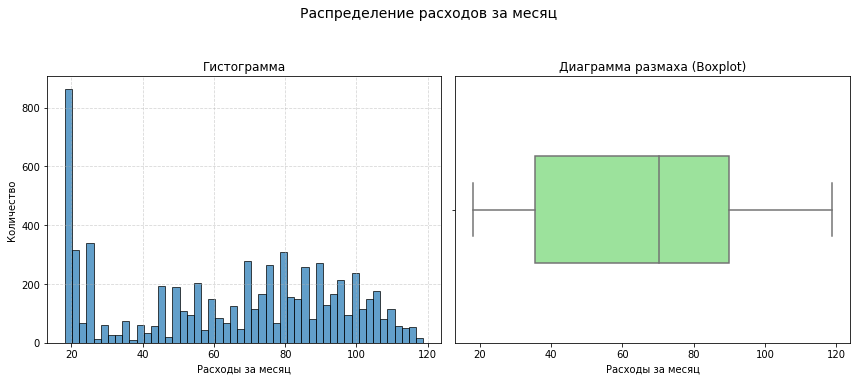

In [54]:
grafics(contract_df['monthly_charges'], 'Расходы за месяц', 'Количество', 
       'Распределение расходов за месяц')

Судя по всему, большая часть людей пользуется базовой услугой, по минимальной стоимости.

In [55]:
q1, q3 = contract_df['monthly_charges'].quantile([0.25, 0.75])
print(f"Q1: {q1}, Q3: {q3}")

Q1: 35.5875, Q3: 89.8625


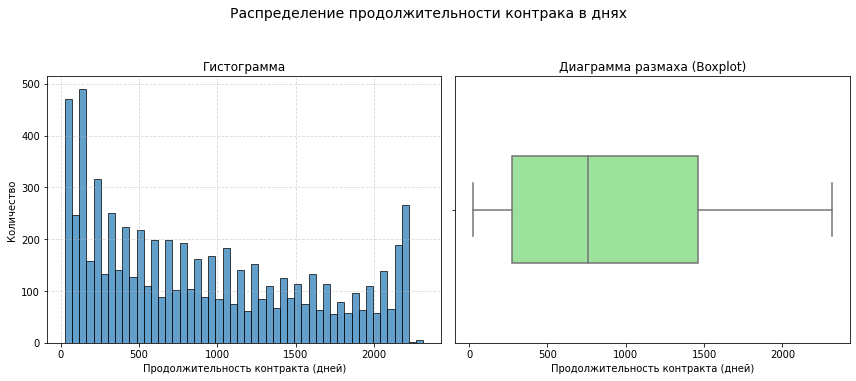

In [56]:
grafics(contract_df['duration_contract'], 'Продолжительность контракта (дней)', 'Количество', 
       'Распределение продолжительности контрака в днях')

In [57]:
contract_df['duration_contract'].max()

2314

Самый долгий контракт составил 2314дней

In [58]:
q1, q3 = contract_df['duration_contract'].quantile([0.25, 0.75])
print(f"Q1: {q1}, Q3: {q3}")

Q1: 276.0, Q3: 1461.0


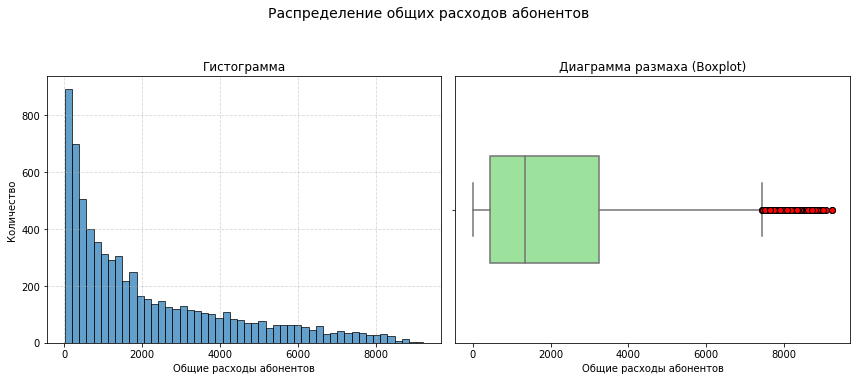

In [59]:
grafics(contract_df['total_charges'], 'Общие расходы абонентов', 'Количество', 
       'Распределение общих расходов абонентов')

In [60]:
contract_df['total_charges'].max()

9221.38

In [61]:
contract_df.sort_values('total_charges').tail(10)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract
4229,5451-YHYPW,two year,yes,credit card,115.75,8834.04,1,2191
850,6007-TCTST,two year,yes,bank transfer,115.80,8837.86,1,2191
2603,0164-APGRB,two year,yes,electronic check,114.90,8851.90,1,2191
2689,8628-MFKAX,two year,yes,credit card,116.75,8910.36,1,2191
3820,9481-IEBZY,month-to-month,yes,credit card,112.90,8941.68,1,2191
540,6859-QNXIQ,two year,yes,bank transfer,113.10,8957.52,1,2191
4206,0017-IUDMW,two year,yes,credit card,116.80,8998.27,1,2191
2559,8263-QMNTJ,two year,yes,electronic check,115.55,9068.36,1,2191
5558,0675-NCDYU,two year,yes,credit card,116.40,9218.88,1,2191
4610,2889-FPWRM,one year,yes,bank transfer,117.80,9221.38,1,2314


На боксплоте наблюдаются красные точки, которые говорят, что данные являются выбросами. Однако, даже самое большое значение - 9221 вполне может достигаться. Из датафрейма выше видно, что такие клиенты достаточно долго не разрывают контракт, поэтому их общие траты высоки относительно других.

Таким образом, не будем считать красные точки выбросами.

=================================

Изучим категориальные признаки

In [62]:
cat_col_names = contract_df.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['customer_id', 'type', 'paperless_billing', 'payment_method']

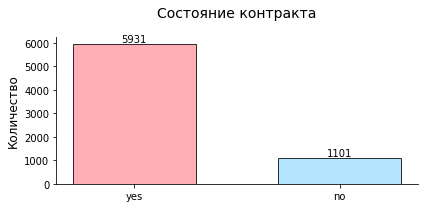

In [63]:
copy_active_contract = contract_df['active_contract'].copy()
copy_active_contract = copy_active_contract.replace({0: 'no', 1: 'yes'})

graf(copy_active_contract, 'Состояние контракта')

Наблюдяется явный дисбаланс классов. Большая часть людей осталась.

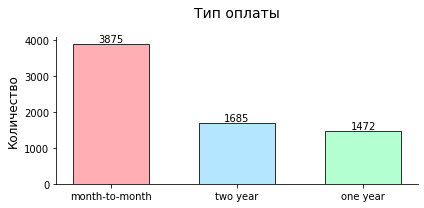

In [64]:
graf(contract_df['type'], 'Тип оплаты')

Большая часть пользователей оплачивает услуги ежемесячно.

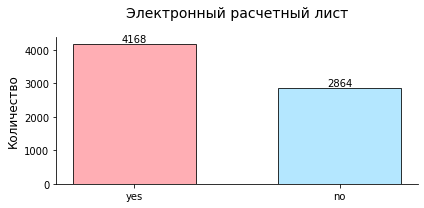

In [65]:
graf(contract_df['paperless_billing'], 'Электронный расчетный лист')

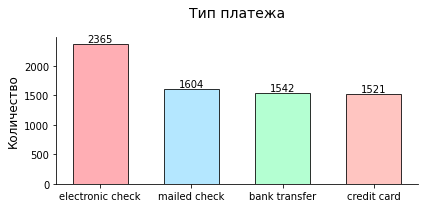

In [66]:
graf(contract_df['payment_method'], 'Тип платежа')

#### **Вывод по анализу contract_df**

- В среднем в месяц расходы клиентов составляют 35 - 90 единиц.
- Продолжительность самого долгого контракта составляет 2314 дней, а средняя продолжительность 260 - 1400 дней.
- Большая часть людей предпочитают оплачивать услуги ежемесячно.
- **Целевая переменная (состояние контракта) распределена неравномерно. Большая часть клиентов осталась.**

#### Анализ personal_df

In [67]:
num_col_names = personal_df.select_dtypes(include='number').columns.tolist()
num_col_names

[]

In [68]:
cat_col_names = personal_df.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

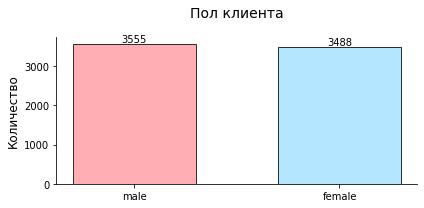

In [69]:
graf(personal_df['gender'], 'Пол клиента')

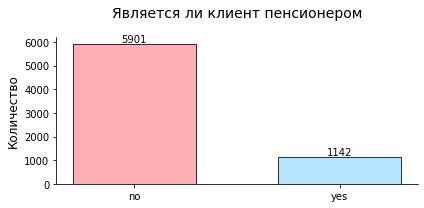

In [70]:
graf(personal_df['senior_citizen'], 'Является ли клиент пенсионером')

Большая часть аудитории - не пенсионеры.

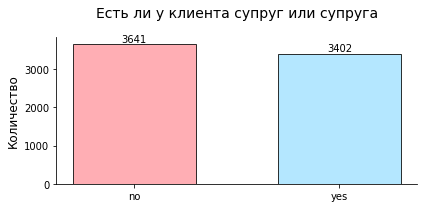

In [71]:
graf(personal_df['partner'], 'Есть ли у клиента супруг или супруга')

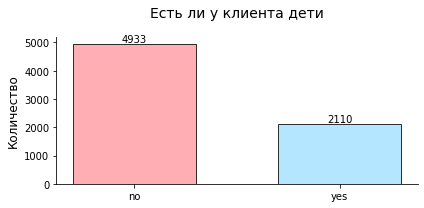

In [72]:
graf(personal_df['dependents'], 'Есть ли у клиента дети')

Большая часть клиентов не имеет детей.

#### **Вывод по анализу personal_df**

- Большая часть клиентов - не пенсионеры и это люди, которые не имеют детей.

#### Анализ internet_df

In [73]:
num_col_names = internet_df.select_dtypes(include='number').columns.tolist()
num_col_names

[]

In [74]:
cat_col_names = internet_df.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['customer_id',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

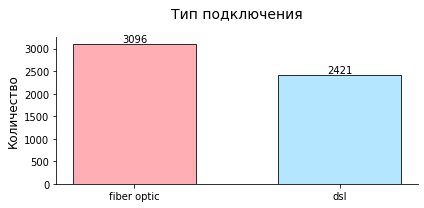

In [75]:
graf(internet_df['internet_service'], 'Тип подключения')

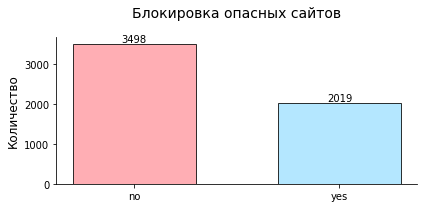

In [76]:
graf(internet_df['online_security'], 'Блокировка опасных сайтов')

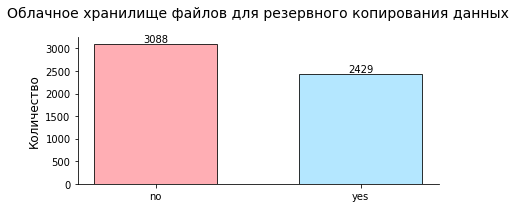

In [77]:
graf(internet_df['online_backup'], 'Облачное хранилище файлов для резервного копирования данных')

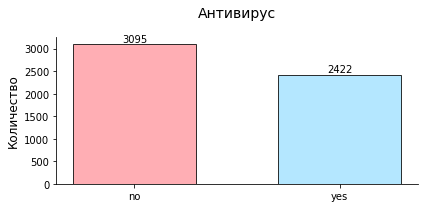

In [78]:
graf(internet_df['device_protection'], 'Антивирус')

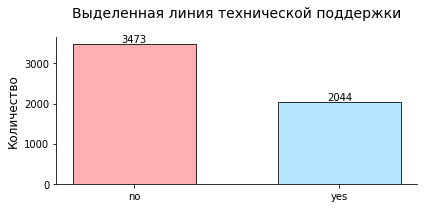

In [79]:
graf(internet_df['tech_support'], 'Выделенная линия технической поддержки')

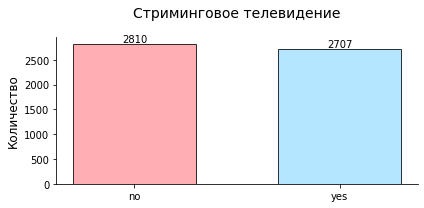

In [80]:
graf(internet_df['streaming_tv'], 'Стриминговое телевидение')

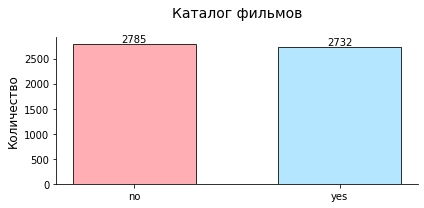

In [81]:
graf(internet_df['streaming_movies'], 'Каталог фильмов')

#### **Вывод по анализу internet_df**

Большая часть аудитории предпочитает:
- Наличие антивируса и возмоность блокировки от опасных сайтов.
- Наличие выделенной линии технической поддержки.
- Тип подключения *fiber optic*

#### Анализ phone_df

In [82]:
num_col_names = phone_df.select_dtypes(include='number').columns.tolist()
num_col_names

[]

In [83]:
cat_col_names = phone_df.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['customer_id', 'multiple_lines']

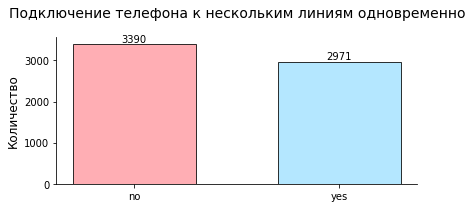

In [84]:
graf(phone_df['multiple_lines'], 'Подключение телефона к нескольким линиям одновременно')

#### **Общий вывод по анализу датафреймов**

- В среднем в месяц расходы клиентов составляют 35 - 90 единиц.
- Продолжительность самого долгого контракта составляет 2314 дней, а средняя продолжительность 260 - 1400 дней.
- Большая часть людей предпочитают оплачивать услуги ежемесячно.
- **Целевая переменная (состояние контракта) распределена неравномерно. Большая часть клиентов осталась.**
- Большая часть клиентов - не пенсионеры и это люди, которые не имеют детей.

Большая часть аудитории предпочитает:
- Наличие антивируса и возмоность блокировки от опасных сайтов.
- Наличие выделенной линии технической поддержки.
- Тип подключения *fiber optic*

#### Объединение датафреймов

Объединим датафреймы по общему ключу `customer_id`

In [85]:
print('Размерность датафрейма "contract_df":', contract_df.shape)
print('Размерность датафрейма "personal_df":', personal_df.shape)
print('Размерность датафрейма "internet_df":', internet_df.shape)
print('Размерность датафрейма "phone_df"   :', phone_df.shape)

Размерность датафрейма "contract_df": (7032, 8)
Размерность датафрейма "personal_df": (7043, 5)
Размерность датафрейма "internet_df": (5517, 8)
Размерность датафрейма "phone_df"   : (6361, 2)


Датафреймы `contract_df` и `personal_df` содержат основную информацию о договорах и клиентах. Однако на этапе предобработки мы удалили 11 строк из `contract_df`, поэтому присоединим оба датафрейма типом присоединения **inner**, чтобы удалить эти 11 id из `personal_df`.

К полученному датафрейму последовательно присоединим датафреймы `internet_df` и `phone_df` типом присоединения **left**, так как остальные датафреймы имеют меньшую размерность.

После присоединения появятся в данных появятся пропущенные значения. Будем считать, что это клиент не воспользовался данной услугой. Заполним пропущенные значения текстом **novalue**

In [87]:
df = personal_df.join(contract_df.set_index('customer_id'), on='customer_id', how='inner')
df = df.join(internet_df.set_index('customer_id'), on='customer_id', how='left')
df = df.join(phone_df.set_index('customer_id'), on='customer_id', how='left')

In [88]:
df.shape

(7032, 20)

In [89]:
df = df.fillna('novalue')

In [90]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,female,no,yes,no,month-to-month,yes,electronic check,29.85,31.04,1,31,dsl,no,yes,no,no,no,no,novalue
1,5575-GNVDE,male,no,no,no,one year,no,mailed check,56.95,2071.84,1,1036,dsl,yes,no,yes,no,no,no,no
2,3668-QPYBK,male,no,no,no,month-to-month,yes,mailed check,53.85,226.17,1,123,dsl,yes,yes,no,no,no,no,no
3,7795-CFOCW,male,no,no,no,one year,no,bank transfer,42.30,1960.60,1,1371,dsl,yes,no,yes,yes,no,no,novalue
4,9237-HQITU,female,no,no,no,month-to-month,yes,electronic check,70.70,353.50,1,153,fiber optic,no,no,no,no,no,no,no


#### Анализ объединенного датафрейма df

Изучим каждый признак в разбивке по целевому признаку active_contract. Будем считать, что у нас есть 2 класса пользователей:
- Класс 0 - клиент, который не расторгнул договор.
- Класс 1 - клиент, который расторгнул договор.

In [91]:
num_col_names = df.select_dtypes(include='number').columns.tolist()
num_col_names

['monthly_charges', 'total_charges', 'active_contract', 'duration_contract']

In [92]:
cat_col_names = df.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

=== Категориальный признак: senior_citizen ===


,Расторгли (%),Активны (%)
senior_citizen,,
no,14.75,85.25
yes,20.32,79.68


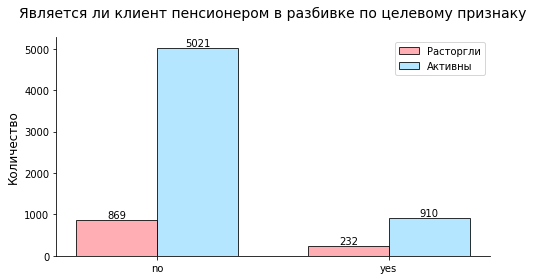

In [93]:
plot_categorical_feature(df, 'senior_citizen', title='Является ли клиент пенсионером в разбивке по целевому признаку')

=== Категориальный признак: partner ===


,Расторгли (%),Активны (%)
partner,,
no,10.50,89.50
yes,21.19,78.81


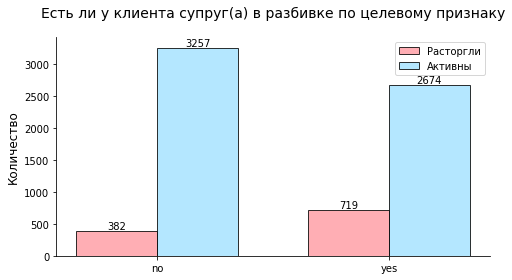

In [94]:
plot_categorical_feature(df, 'partner', title='Есть ли у клиента супруг(а) в разбивке по целевому признаку')

=== Категориальный признак: type ===


,Расторгли (%),Активны (%)
type,,
month-to-month,10.50,89.50
one year,21.26,78.74
two year,22.61,77.39


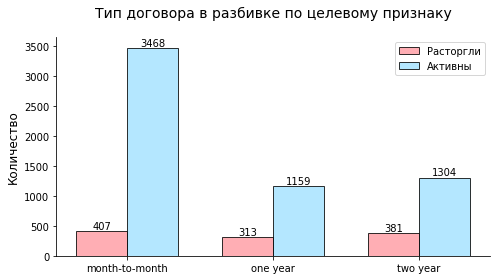

In [95]:
plot_categorical_feature(df, 'type', title='Тип договора в разбивке по целевому признаку')

=== Категориальный признак: multiple_lines ===


,Расторгли (%),Активны (%)
multiple_lines,,
no,9.45,90.55
novalue,15.15,84.85
yes,22.85,77.15


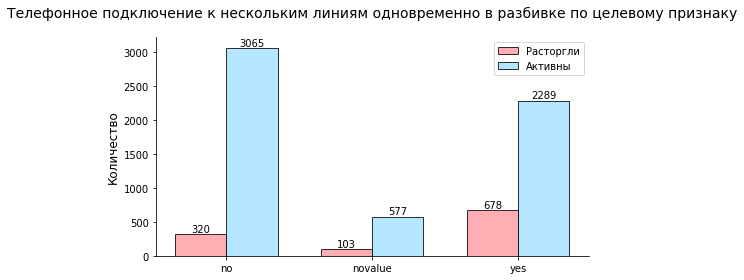

In [96]:
plot_categorical_feature(df, 'multiple_lines', title='Телефонное подключение к нескольким линиям одновременно в разбивке по целевому признаку')

=== Категориальный признак: streaming_movies ===


,Расторгли (%),Активны (%)
streaming_movies,,
no,12.05,87.95
novalue,10.53,89.47
yes,22.19,77.81


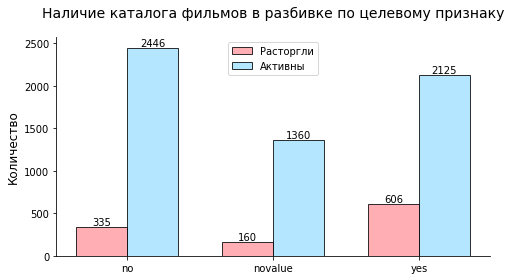

In [97]:
plot_categorical_feature(df, 'streaming_movies', title='Наличие каталога фильмов в разбивке по целевому признаку')

=== Категориальный признак: streaming_tv ===


,Расторгли (%),Активны (%)
streaming_tv,,
no,12.71,87.29
novalue,10.53,89.47
yes,21.61,78.39


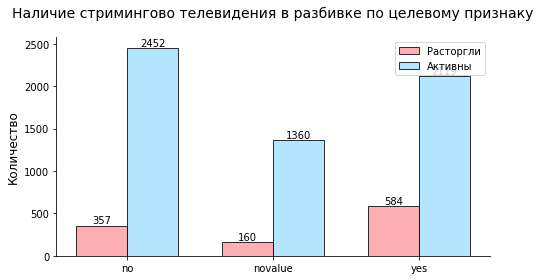

In [98]:
plot_categorical_feature(df, 'streaming_tv', title='Наличие стримингово телевидения в разбивке по целевому признаку')

=== Категориальный признак: tech_support ===


,Расторгли (%),Активны (%)
tech_support,,
no,15.64,84.36
novalue,10.53,89.47
yes,19.51,80.49


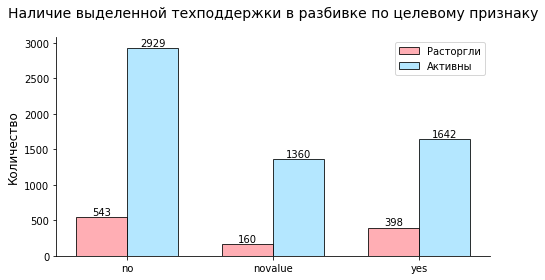

In [99]:
plot_categorical_feature(df, 'tech_support', title='Наличие выделенной техподдержки в разбивке по целевому признаку')

=== Категориальный признак: device_protection ===


,Расторгли (%),Активны (%)
device_protection,,
no,12.64,87.36
novalue,10.53,89.47
yes,22.75,77.25


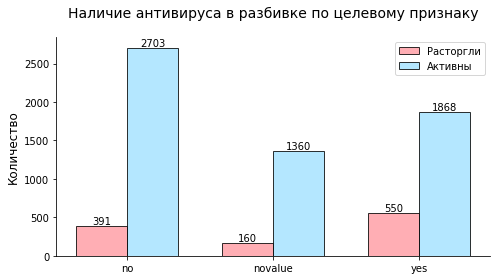

In [100]:
plot_categorical_feature(df, 'device_protection', title='Наличие антивируса в разбивке по целевому признаку')

=== Категориальный признак: online_backup ===


,Расторгли (%),Активны (%)
online_backup,,
no,12.34,87.66
novalue,10.53,89.47
yes,23.09,76.91


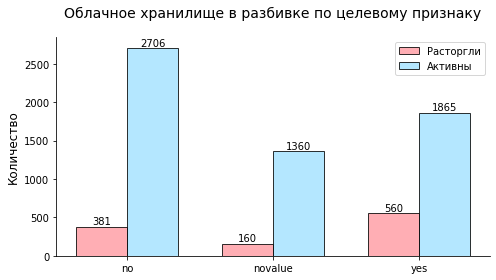

In [101]:
plot_categorical_feature(df, 'online_backup', title='Облачное хранилище в разбивке по целевому признаку')

=== Категориальный признак: paperless_billing ===


,Расторгли (%),Активны (%)
paperless_billing,,
no,13.27,86.73
yes,17.30,82.70


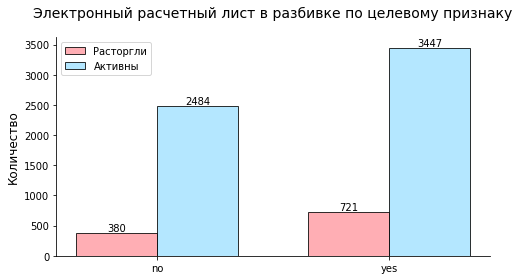

In [102]:
plot_categorical_feature(df, 'paperless_billing', title='Электронный расчетный лист в разбивке по целевому признаку')

=== Категориальный признак: dependents ===


,Расторгли (%),Активны (%)
dependents,,
no,14.86,85.14
yes,17.53,82.47


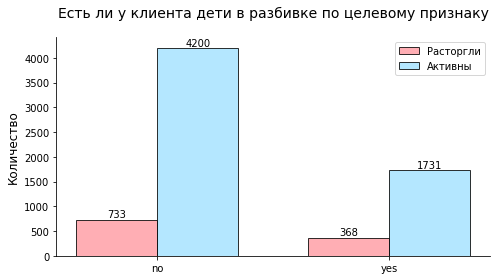

In [103]:
plot_categorical_feature(df, 'dependents', title='Есть ли у клиента дети в разбивке по целевому признаку')

=== Категориальный признак: internet_service ===


,Расторгли (%),Активны (%)
internet_service,,
dsl,14.32,85.68
fiber optic,19.22,80.78
novalue,10.53,89.47


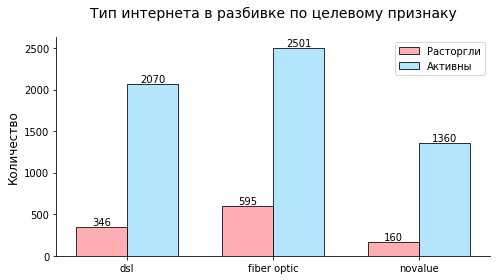

In [104]:
plot_categorical_feature(df, 'internet_service', title='Тип интернета в разбивке по целевому признаку')

=== Категориальный признак: payment_method ===


,Расторгли (%),Активны (%)
payment_method,,
bank transfer,20.56,79.44
credit card,20.84,79.16
electronic check,14.80,85.20
mailed check,7.29,92.71


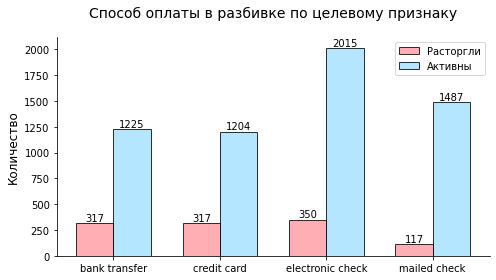

In [105]:
plot_categorical_feature(df, 'payment_method', title='Способ оплаты в разбивке по целевому признаку')

=== Категориальный признак: gender ===


,Расторгли (%),Активны (%)
gender,,
female,15.16,84.84
male,16.15,83.85


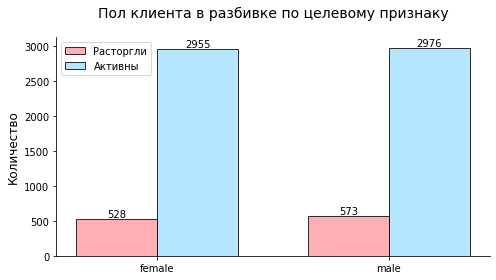

In [106]:
plot_categorical_feature(df, 'gender', title='Пол клиента в разбивке по целевому признаку')

=== Категориальный признак: online_security ===


,Расторгли (%),Активны (%)
online_security,,
no,15.04,84.96
novalue,10.53,89.47
yes,20.60,79.40


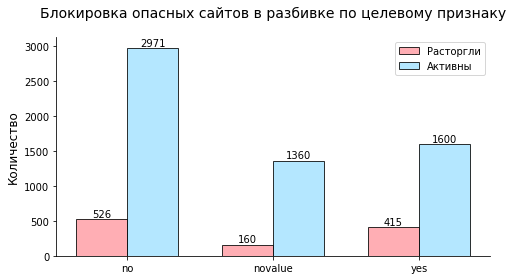

In [107]:
plot_categorical_feature(df, 'online_security', title='Блокировка опасных сайтов в разбивке по целевому признаку')

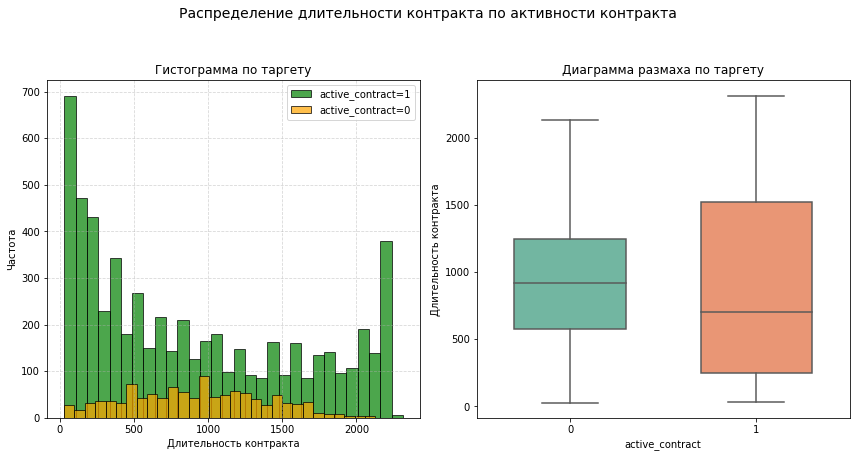

In [108]:
# Для duration_contract
grafics_target(df, 'duration_contract', 'active_contract', 'Длительность контракта', 'Частота', 'Распределение длительности контракта по активности контракта')

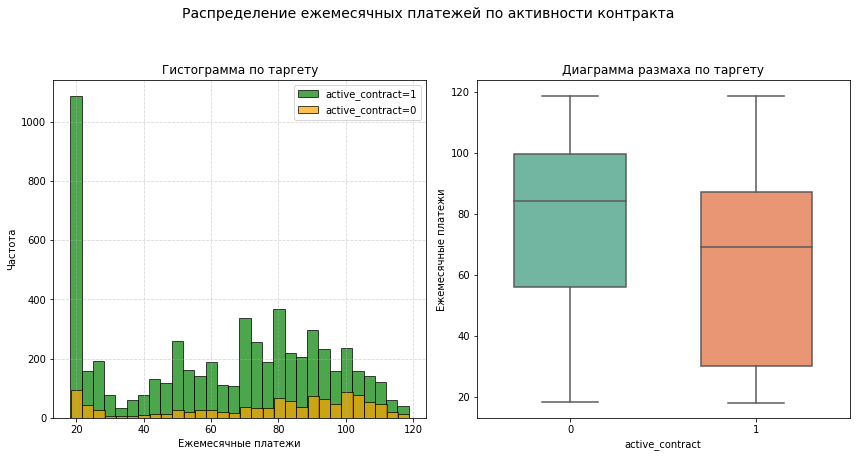

In [109]:
# Для monthly_charges
grafics_target(df, 'monthly_charges', 'active_contract', 'Ежемесячные платежи', 'Частота', 'Распределение ежемесячных платежей по активности контракта')

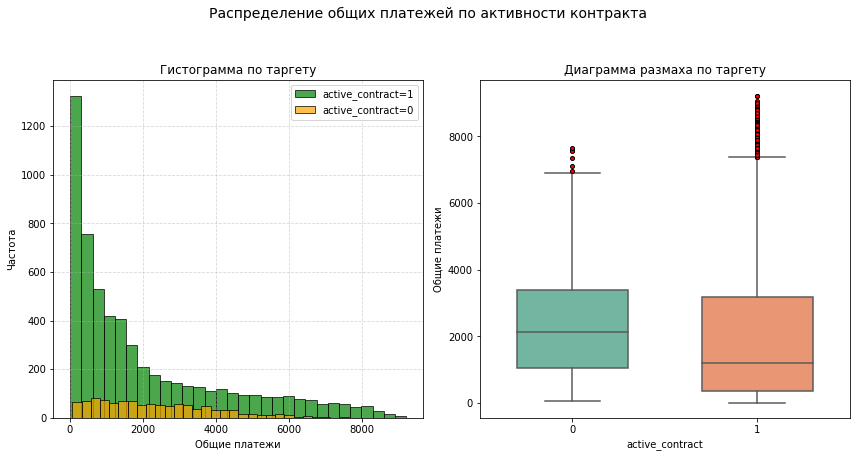

In [110]:
# Для total_charges
grafics_target(df, 'total_charges', 'active_contract', 'Общие платежи', 'Частота', 'Распределение общих платежей по активности контракта')

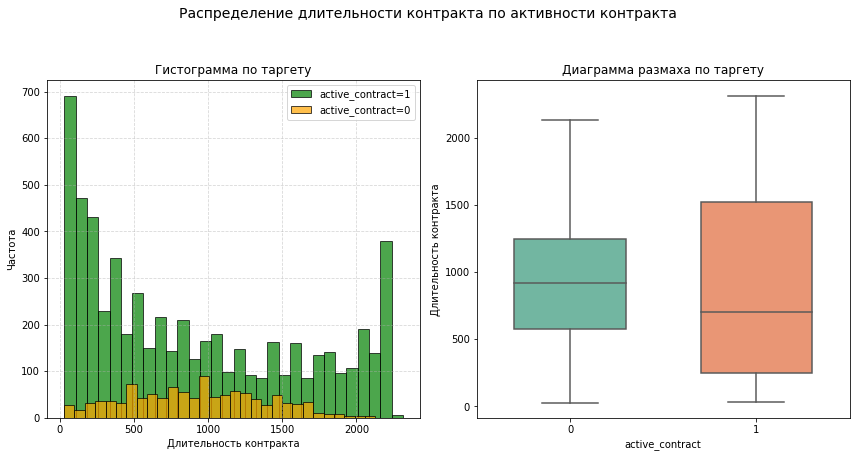

In [111]:
# Для duration_contract
grafics_target(df, 'duration_contract', 'active_contract', 'Длительность контракта', 'Частота', 'Распределение длительности контракта по активности контракта')

#### **Портрет клиента, который может расторгнуть договор**

Просмотрев визуалиции в разбивке по целевому признаку, можно составить портрет клиента, который наиболее вероятно расторгнет договор.

Человек, который с наибольшей вероятностью расторгнет договор, обычно соответствует следующим критериям:

1. Не является пенсионером
2. Выбирает ежемесячную форму оплаты услуг  
3. Пользуется многолинейной телефонной связью
4. Не подключена услуга выделенной технической поддержки
5. Использует антивирусную защита
6. Использует облачное хранилище для резервного копирования
7. Не активирована услуга блокировки опасных сайтов
8. Предпочитает оплату электронными чеками
9. Не имеет детей
10. Использует оптоволоконное подключение к интернету
11. Среднемесячные расходы на услуги составляют 60-100 единиц

### Подготовка признаков

#### Анализ коллинеарности признаков

Изучим коллинеарность признаков с помощью Phik матрицы

In [112]:
df.set_index('customer_id', inplace=True)

In [113]:
interval_cols = df.select_dtypes('number').columns.tolist()
interval_cols 

['monthly_charges', 'total_charges', 'active_contract', 'duration_contract']

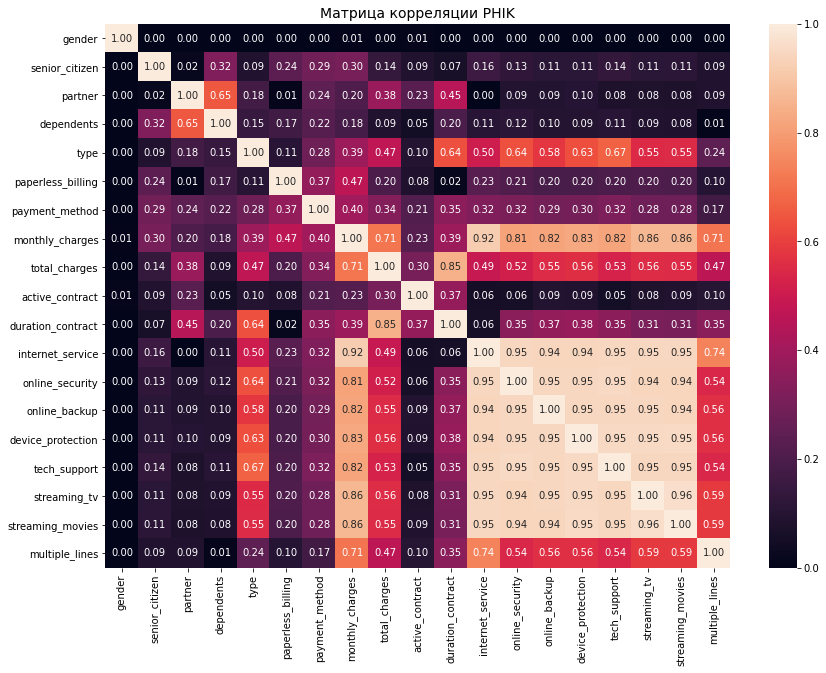

In [114]:
interval_cols = ['monthly_charges', 'total_charges', 'duration_contract']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(14,10))
sns.heatmap(phik_overview.round(3), annot=True, fmt='.2f')
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

Можно сделать такие выводы:
- Все признаки достаточно слабо коррелируют с целевым
- Признак **gender** почти совсем не коррелирует, удалим его
- Признаки **internet_service**, **online_security**, **online_backup**, **device_protection**, **tech_support**, **streaming_tv**, **streaming_movies** являются мультиколлинеарными между собой. Держать их в датафрейме нет смысла. Нужно оставить один, который лучше всего коррелирует с целевым признаком.


Чтобы выбрать самый подходящий признак из мультиколлинеарных, взлянем на более точную матрицу корреляций.

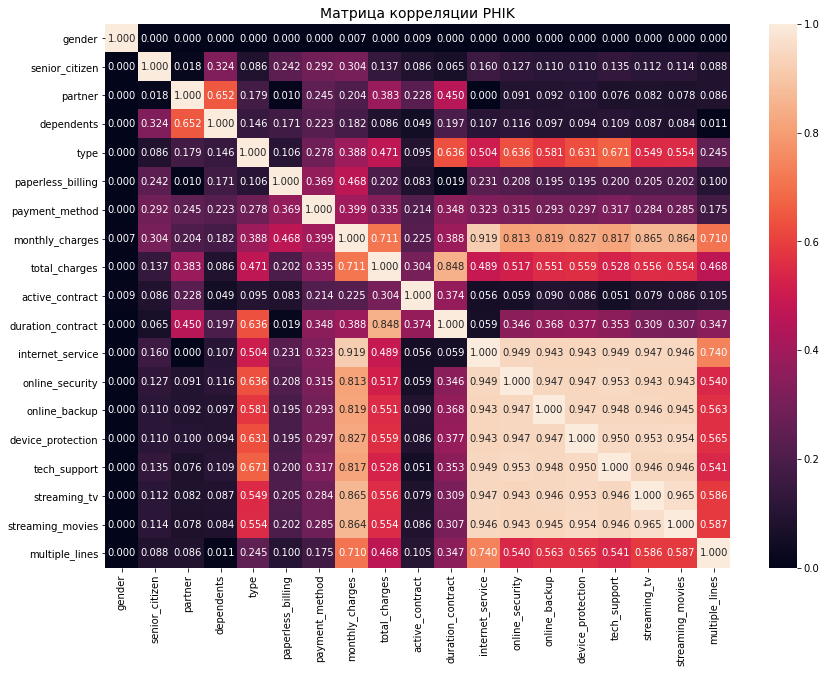

In [115]:
interval_cols = ['monthly_charges', 'total_charges', 'duration_contract']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(14,10))
sns.heatmap(phik_overview.round(3), annot=True, fmt='.3f')
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

Видно, что из мультиколлинеарных признаков, лучше всех связан с целевым признак **online_backup**, поэтому его оставим.


**ИТОГ**

Удалим признаки: ['gender', 'internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

In [116]:
features_to_drop = ['gender', 'internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

In [117]:
df = df.drop(columns=features_to_drop)

In [118]:
df = df.reset_index(drop=True)

In [119]:
df.head()

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract,online_backup,multiple_lines
0,no,yes,no,month-to-month,yes,electronic check,29.85,31.04,1,31,yes,novalue
1,no,no,no,one year,no,mailed check,56.95,2071.84,1,1036,no,no
2,no,no,no,month-to-month,yes,mailed check,53.85,226.17,1,123,yes,no
3,no,no,no,one year,no,bank transfer,42.30,1960.60,1,1371,no,novalue
4,no,no,no,month-to-month,yes,electronic check,70.70,353.50,1,153,no,no


#### Разделение данных на тренирочоную и тестовую выборки

В этом разделе разделим данные на тренировочную и тестовые выборки в соотношении 75:25 соответственно

In [120]:
X = df.drop('active_contract', axis=1)
y = df['active_contract']
    
    #разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=201025, 
    stratify=y,
    test_size=0.25)

In [121]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
y_test.shape

(5274, 11)

(1758, 11)

(5274,)

(1758,)

Метрика ROC-AUC нечувствительна к дисбалансу классов, поэтому не будем решать проблему дисбаланса.

ROC AUC строится на основе:

- **TPR (True Positive Rate)** = TP / (TP + FN) - зависит только от положительного класса
- **FPR (False Positive Rate)** = FP / (FP + TN) - зависит только от отрицательного класса

Обе метрики нормированы на размер своего класса, поэтому изменение пропорций классов не влияет на них.

### Обучение моделей

На этом этапе обучим 4 модели:
1. DummyClassifier
2. LogisticRegression
3. CatBoostClassifier
4. LightGBMClassiifier

 Алгоритм работы будет выглядеть так:
- выполнение кросс валидации с оптимизацией параметров с помощью RandomSearchCV;
- выбор лучшей модели по результатам кросс валидации; 
- оценка метрики `ROC-AUC` лучшей модели на тестовой выборке;

#### **DummyClassifier**

DummyClassifier - это простой классификатор, который делает предсказания по простым правилам без учета реальных признаков данных. Будем использовать его как нижний порог, ниже которого совсем нельзя опускаться более сложным моделям. Будем использовать стратегию **stratified**, которая генерирует случайные предсказания, сохраняя распределение классов из обучающей выборки, то есть предсказывает классы с той же частотой, с которой они встречаются в исходных данных.

In [122]:
start = time()

dummy = DummyClassifier(strategy='stratified', random_state=201125)
dummy.fit(X_train, y_train)

# Предсказание
y_pred_proba = dummy.predict_proba(X_train)[:, 1]
roc_auc = roc_auc_score(y_train, y_pred_proba)

print('DummyClassifier (stratified)')
print('ROC-AUC:', roc_auc)

end = time()
time_dummy = round((end - start), 2)
print(f'Время выполнения: {time_dummy} секунд')

DummyClassifier (stratified)
ROC-AUC: 0.5063526660511783
Время выполнения: 0.01 секунд


Ниже `ROC-AUC= 0.52` опускаться нельзя

#### **LogisticRegression**

LogisticRegression - это линейная модель классификации, которая предсказывает вероятности принадлежности объектов к классам с помощью логистической функции. Поскольку логистическая регрессия чувствительна к масштабу данных, выполним в пайплайне кодирование категориальных переменных и масштабирование числовых признаков с помощью OneHotEncoder и StandardScaler соответственно.

In [123]:
start = time()

# Создаем копию данных
X_train_copy = X_train.copy()

# Определяем числовые и категориальные колонки
num_columns = ['monthly_charges', 'total_charges', 'duration_contract']
cat_columns = ['senior_citizen', 'partner', 'dependents', 'type', 'paperless_billing', 
               'payment_method', 'online_backup', 'multiple_lines']

# Создаем препроцессор
data_preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Создаем пайплайн
pipeline = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# Параметры для Random Search
parameters_lr = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100, 200, 500],
    'model__class_weight': [None, 'balanced']
}

# Random Search
random_search_lr = RandomizedSearchCV(
    pipeline,
    parameters_lr,
    cv=3,
    scoring='roc_auc',
    n_iter=10,
    n_jobs=-1,
    verbose=1,
    random_state=201125
)

# Обучение
random_search_lr.fit(X_train_copy, y_train)

# Результаты
best_params_lr = random_search_lr.best_params_
best_model_lr = random_search_lr.best_estimator_

roc_auc_train_LR = random_search_lr.best_score_
print('Лучшие параметры для LogisticRegression:', best_params_lr)
print('ROC-AUC на кросс-валидации:', roc_auc_train_LR)

end = time()
time_random_search = round((end-start)/60,2)
print(f'Время выполнения: {time_random_search} минут')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры для LogisticRegression: {'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__max_iter': 500, 'model__class_weight': 'balanced', 'model__C': 100}
ROC-AUC на кросс-валидации: 0.7751963211860122
Время выполнения: 0.1 минут


#### **CatBoostClassifier**

СatBoostClassifier - это градиентный бустинг на деревьях решений, специально разработанный для эффективной работы с категориальными признаками. Модель автоматически обрабатывает категориальные переменные с помощью продвинутого алгоритма кодирования, избегая предварительного ручного преобразования данных. В нашем случае мы явно указываем модели, какие признаки являются категориальными, передавая ей список categorical_features.

In [124]:
start = time()

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

model = CatBoostClassifier(
    verbose=0,
    random_state=201125,
    allow_writing_files=False,
    cat_features=categorical_features
)

parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'iterations': [100, 200, 300, 400, 500],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    'random_strength': [0, 1, 2],
    'min_data_in_leaf': [1, 5, 10, 15, 20]
}

random_search = RandomizedSearchCV(
    model,
    parameters,
    random_state=201125,
    cv=3,
    scoring='roc_auc',
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

roc_auc_train_CatBoost = random_search.best_score_
best_CatBoost_model = random_search.best_estimator_

print('ROC-AUC на кросс-валидации:', roc_auc_train_CatBoost)
print('Лучшие параметры:', random_search.best_params_)

end = time()
time_random_search = round((end-start)/60,2)
print(f'Время вkjyыполнения: {time_random_search} минут')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
ROC-AUC на кросс-валидации: 0.8998564449987674
Лучшие параметры: {'subsample': 1.0, 'random_strength': 1, 'min_data_in_leaf': 5, 'learning_rate': 0.3, 'l2_leaf_reg': 3, 'iterations': 400, 'depth': 4, 'colsample_bylevel': 1.0}
Время вkjyыполнения: 1.93 минут


#### **LightGMBClassifier**

LightGBM - это высокопроизводительный градиентный бустинг на деревьях, оптимизированный для скорости и эффективности использования памяти. В отличие от CatBoost, LightGBM требует предварительного преобразования категориальных признаков в тип 'category'. Для этого мы явно указываем категориальные признаки через categorical_features и преобразуем их с помощью цикла.

In [126]:
start = time()

X_train_encoded = X_train.copy()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    X_train_encoded[col] = X_train_encoded[col].astype('category')

model = lgb.LGBMClassifier(
    verbose=-1,
    random_state=201125,
    n_jobs=-1
)

parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10, -1],
    'reg_alpha': [0, 1, 3, 5, 7, 10],
    'reg_lambda': [0, 1, 3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [1, 5, 10, 15, 20],
    'num_leaves': [31, 50, 100, 200],
    'subsample_freq': [0, 1, 5]
}

random_search = RandomizedSearchCV(
    model,
    parameters,
    random_state=201125,
    cv=3,
    scoring='roc_auc',
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_encoded, y_train)

roc_auc_train_LightGBM = random_search.best_score_
best_LightGBM_model = random_search.best_estimator_

print('ROC-AUC на кросс-валидации:', roc_auc_train_LightGBM)
print('Лучшие параметры:', random_search.best_params_)

end = time()
time_random_search = round((end-start)/60,2)
print(f'Время выполнения: {time_random_search} минут')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
ROC-AUC на кросс-валидации: 0.8627962337328056
Лучшие параметры: {'subsample_freq': 0, 'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 10, 'max_depth': 8, 'learning_rate': 0.25, 'colsample_bytree': 0.7}
Время выполнения: 1.26 минут


#### Выбор лучшей модели

Лучшей оказалась модель **CatBoostClassifier**. На кросс валидации эта модель показала результат `ROC-AUC=0.899`

In [128]:
print("Параметры лучшей CatBoost модели:")
for param, value in best_CatBoost_model.get_params().items():
    print(f"{param}: {value}")

Параметры лучшей CatBoost модели:
iterations: 400
learning_rate: 0.3
depth: 4
l2_leaf_reg: 3
verbose: 0
random_strength: 1
allow_writing_files: False
subsample: 1.0
colsample_bylevel: 1.0
random_state: 201125
cat_features: ['senior_citizen', 'partner', 'dependents', 'type', 'paperless_billing', 'payment_method', 'online_backup', 'multiple_lines']
min_data_in_leaf: 5


###  Предсказание на тестовой выборке

In [129]:
start = time()

# Делаем предсказания на тестовых данных
y_pred_proba = best_CatBoost_model.predict_proba(X_test)[:, 1]

end = time()

time_predict_CatBoost = round((end-start)/60, 2)

# Считаем метрику ROC-AUC
roc_auc_test = roc_auc_score(y_test, y_pred_proba)

print(f'Время предсказания: {time_predict_CatBoost} мин')
print(f'ROC-AUC на тестовых данных: {roc_auc_test:.4f}')

Время предсказания: 0.0 мин
ROC-AUC на тестовых данных: 0.9150


Успех. Цель достигнута, полученный `ROC-AUC >= 0.85`.

#### Интерпретация результатов

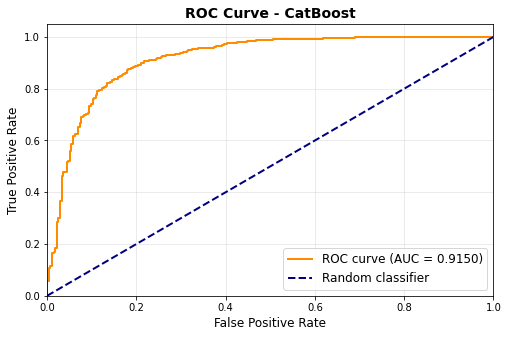

In [130]:
# Вычисляем ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - CatBoost', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)

ROC кривая достаточно сильно выпукла вверх, это значит, что модель эффективно разделяет положительный и отрицательный классы.

In [131]:
y_pred = best_CatBoost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9158


Модель с точностью примерно 92% определяет класс объекта. Однако у нас наблюдался достаточно сильный дисбаланс классов, который может привести к лучшей предсказуемости большего класса (класса 0 - договор расторгнут)

=========================================

Проанализируем матрицу ошибок и метрики precision и recall

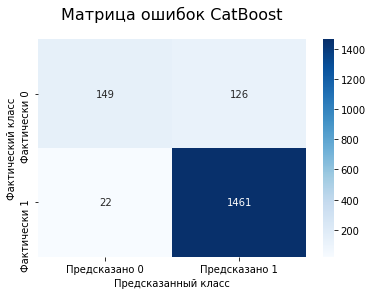

Precision: 0.9206
Recall: 0.9852



In [132]:
# Предсказание классов на тестовых данных
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Предсказано 0', 'Предсказано 1'], 
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.title('Матрица ошибок CatBoost', fontsize=16, pad=20)
plt.ylabel('Фактический класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Расчет precision и recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print()

- Precision = 0.9206- из всех предсказанных "уходящих" клиентов 92% действительно уйдут
- Recall = 0.9852 - находим только 98% реально уходящих клиентов

<Figure size 720x432 with 0 Axes>

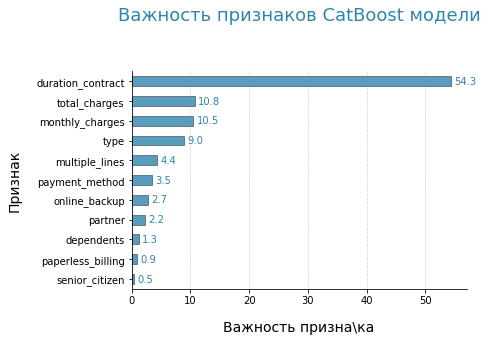

In [133]:
# Получаем важность признаков из CatBoost модели
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_CatBoost_model.get_feature_importance()
})

# Сортируем по важности
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Строим красивый график
plt.figure(figsize=(10, 6))
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', 
                            legend=False, color='#2E86AB', alpha=0.8,
                            edgecolor='black', linewidth=0.5)

# Стилизация графика
plt.title('Важность признаков CatBoost модели\n', 
          pad=30, fontsize=18, color='#2E86AB')
plt.xlabel('Важность призна\ка', fontsize=14, labelpad=15)
plt.ylabel('Признак', fontsize=14, labelpad=15)

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Сетка
plt.grid(axis='x', linestyle='--', alpha=0.3, color='gray')

# Добавляем значения на график с красивым оформлением
for i, v in enumerate(feature_importance['Importance']):
    ax.text(v + max(feature_importance['Importance']) * 0.01, i, 
            f"{v:.1f}", 
            color='#2E86AB', 
            va='center', 
            fontsize=10)

Для модели самый важный признак - длительность контракта.

### Итоговый вывод

**Вывод**

Цель проекта достигнута, полученная метрика `ROC-AUC = 0.915`, что больше 0.85.

Было обучено 4 модели:
1. DummyClassifier
2. LogisticRegression
3. CatBoostClassifier
4. LightGBMClassiifier

Лучшей оказалась модель CatBoostClassifier с параметрами: {'subsample': 1.0, 'random_strength': 1, 'min_data_in_leaf': 5, 'learning_rate': 0.3, 'l2_leaf_reg': 3, 'iterations': 400, 'depth': 4, 'colsample_bylevel': 1.0}

**Основные этапы работы**

***1 ЭТАП.*** Данные были успешно загружены и предобработаны. Данные приведены к верным типам, выполнена обработка пропущенных значений. Также на этом были удалены признаки, на основе которых был создан новый признак - целевой


***2 ЭТАП.*** Был проведен исследовательский анализ данных каждого датафрйема **contract_df**, **personal_df**, **internet_df**, **phone_df**, по которому можно выделить такие факты о клиентах:
- В среднем в месяц расходы клиентов составляют 35 - 90 единиц.
- Продолжительность самого долгого контракта составляет 2314 дней, а средняя продолжительность 260 - 1400 дней.
- Большая часть людей предпочитают оплачивать услуги ежемесячно.
- **Целевая переменная (состояние контракта) распределена неравномерно. Большая часть клиентов осталась.**
- Большая часть клиентов - не пенсионеры и это люди, которые не имеют детей.

Большая часть аудитории предпочитает:
- Наличие антивируса и возмоность блокировки от опасных сайтов.
- Наличие выделенной линии технической поддержки.
- Тип подключения *fiber optic*

Также в этом разделе было произведено объедиение четырех датафреймов в один **df**, после анализа которого можно было составить портрет человека, который наиболее вероятно расторгнет контракт:

Человек, который с наибольшей вероятностью расторгнет договор, обычно соответствует следующим критериям:

1. Не является пенсионером
2. Выбирает ежемесячную форму оплаты услуг  
3. Пользуется многолинейной телефонной связью
4. Не подключена услуга выделенной технической поддержки
5. Использует антивирусную защита
6. Использует облачное хранилище для резервного копирования
7. Не активирована услуга блокировки опасных сайтов
8. Предпочитает оплату электронными чеками
9. Не имеет детей
10. Использует оптоволоконное подключение к интернету
11. Среднемесячные расходы на услуги составляют 60-100 единиц


***3 ЭТАП.*** Этап подготовки признаков. Была проведена проверка признаков на мультиколлинеарность, в ходе которой удалось понизить размерность датафрейма для дальнейшего обучения моделей. Затем была проведена разбивка данных на тренировочную и тестовую выборки.


***4 ЭТАП.*** Этап обучения моделей.
Было обучено 4 модели:
1. DummyClassifier
2. LogisticRegression
3. CatBoostClassifier
4. LightGBMClassiifier

Лучшей оказалась модель CatBoostClassifier с параметрами: {'subsample': 1.0, 'random_strength': 1, 'min_data_in_leaf': 5, 'learning_rate': 0.3, 'l2_leaf_reg': 3, 'iterations': 400, 'depth': 4, 'colsample_bylevel': 1.0}


***5 ЭТАП.*** Этап предсказаний на тестовой выборке.

Была получена метрика на тестовой выборке: `ROC-AUC на тестовых данных: 0.915`

Была построена ROC кривая, по которой можно сделать следующий вывод: модель эффективно разделяет положительный и отрицательный классы.
Также был проведен анализ важности признаков: самый важный признак для модели - продолжительность контракта в днях.
А матрица ошибок показала:
- Precision = 0.9206- из всех предсказанных "уходящих" клиентов 92% действительно уйдут
- Recall = 0.9852 - находим только 98% реально уходящих клиентов